#### Setup

In [2]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#### Plotting functions

In [3]:
def plot_circuit_responses(u, W, eigenstuff = False,
                           xlim='default',
                           ylim='default'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Set up axis limits
    if xlim == 'default':
      extreme = np.maximum(np.abs(np.min(u)), np.max(u))
      xlim = [- extreme, extreme]
    if ylim == 'default':
      extreme = np.maximum(np.abs(np.min(u)), np.max(u))
      ylim = [- extreme, extreme]

    # Set up look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    cs = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Set up tracking textz
    tracker_text = ax.text(.5, .9, "", color='w',
                           fontsize=20,
                           verticalalignment='top',
                           horizontalalignment='left',
                           transform=ax.transAxes)

    # Plot eigenvectors
    if eigenstuff:
      eigvals, eigvecs = np.linalg.eig(W)

      if np.abs(eigvals[0]) < np.abs(eigvals[1]):
        lc1 = 'c'
        lc2 = 'g'
      else:
        lc1 = 'g'
        lc2 = 'c'

      ax.plot(np.arange(-10000, 10000)*eigvecs[0, 0],
              np.arange(-10000, 10000)*eigvecs[1, 0],
              lc1, alpha=.5, label = r'$\mathbf{v}_1$')
      ax.plot(np.arange(-10000, 10000)*eigvecs[0, 1],
              np.arange(-10000, 10000)*eigvecs[1, 1],
              lc2, alpha=.5, label = r'$\mathbf{v}_2$')
      ax.legend()

    # Set up scatter
    cmap = plt.cm.coolwarm
    norm = plt.Normalize(vmin=0, vmax=u.shape[1])
    ax.plot(u[0,:], u[1, :], alpha=.4, zorder = 0)
    scatter = ax.scatter(u[0, :], u[1, :], alpha=1,
                         c=cmap(norm(np.arange(u.shape[1]))),
                         zorder=1)


    ax.set(xlabel='Neuron 1 Firing Rate ($a_1$)',
           ylabel='Neuron 2 Firing Rate ($a_2$)',
           title='Neural firing over time')

    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
                 ax=ax, label='Time step')

### Section 1: Defining a neural circuit


\begin{aligned}
a_{1, t} &= w_{1, 1}a_{1, t-1} + w_{2, 1}a_{2, t-1}\\
a_{2, t} &= w_{1, 2}a_{1, t-1} + w_{2, 2}a_{2, t-1}
\end{aligned}

<br>

\begin{equation}
\mathbf{W} = \begin{bmatrix} w_{1, 1} & w_{2, 1} \\ w_{1, 2} & w_{2, 2} \end{bmatrix}, \mathbf{a}_{t} =   \begin{bmatrix} a_{1, t} \\ a_{2, t} \end{bmatrix}
\end{equation}


#### Coding Exercise 1: Implementing the circuit

In this exercise, you will implement the function `circuit_implementation`. Given a weight matrix, initial activities at time 0, and a number of time bins to model, this function calculates the neural firing rates at each time bin.

We will use initial firing rates of 1 for both neurons:

\begin{equation}
\mathbf{a}_0 =
\begin{bmatrix}
1 \\
1
\end{bmatrix}
\end{equation}

and the weight matrix:

\begin{equation}
\mathbf{W} =
\begin{bmatrix}
1 & 0.2 \\
0.1 & 1
\end{bmatrix}
\end{equation}

We will look at activity over 30 time steps. As before, we will allow our firing rates to be negative, despite this not being possible biologically.

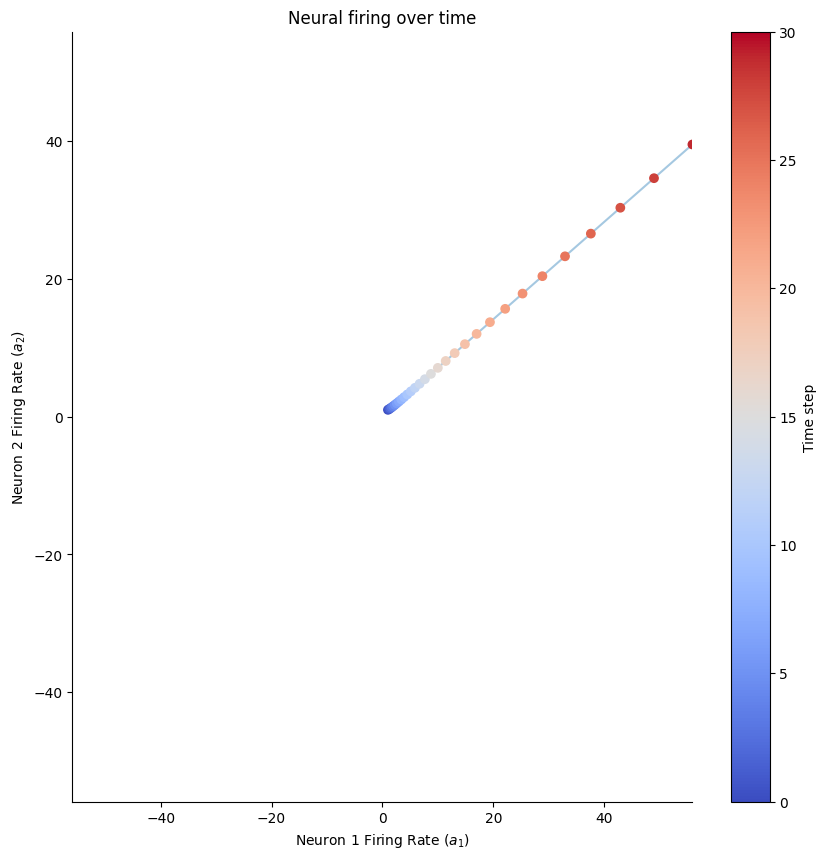

In [11]:
def circuit_implementation(W, a0, T):
    """ Simulate the responses of N neurons over time given their connections

    Args:
        W (ndarray): weight matrix of synaptic connections, should be N x N
        a0 (ndarray): initial condition or input vector, should be N,
        T (scalar): number of time steps to run simulation for

    Returns:
        a (ndarray): the neural responses over time, should be N x T

    """

    # Compute the number of neurons
    N = W.shape[0]
  
    
    # Initialize empty response array and initial condition
    a = np.zeros((N,T))
    
    a[:,0] = a0

    

    # Loop over time steps and compute u(t+1)
    for i_t in range(1,T):
        a[:,i_t] = W @ a[:,i_t-1] 
        
   
    return a

# Define W, u0, T
W = np.array([[1,.2],[.1,1]])
a0 = np.array([1,1])
T = 30

# Get Neural Activities
a = circuit_implementation(W,a0,T)

# Visualize neural activities
plot_circuit_responses(a,W)


2


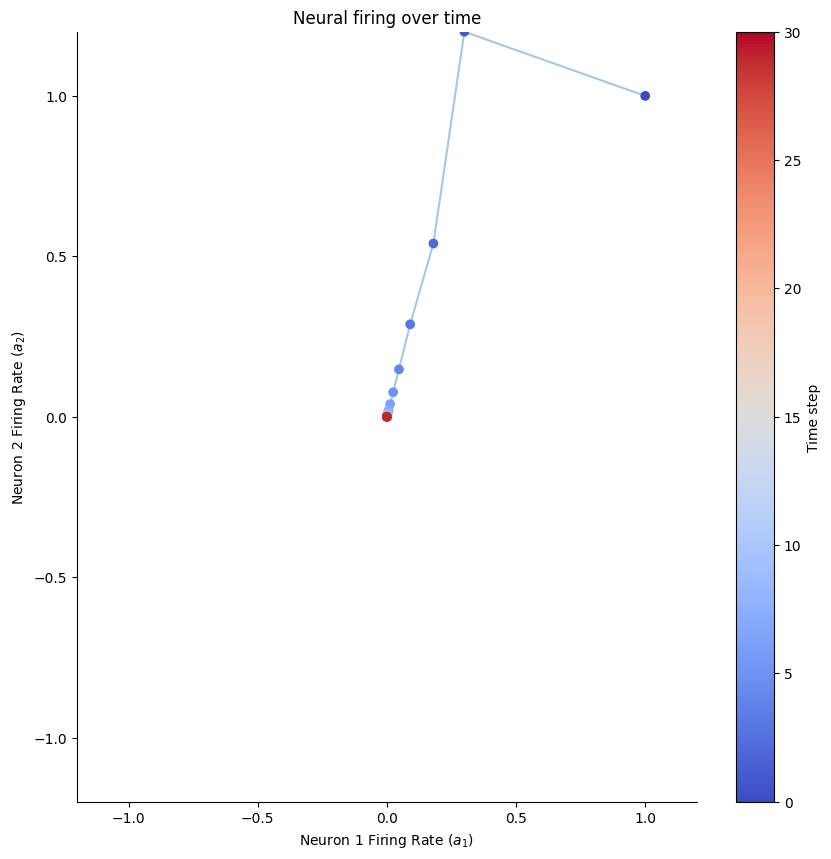

In [5]:
# Define W, a0, T
W = np.array([[.2, .1], [1, .2]])
a0 = np.array([1, 1])
T = 30

# Get neural activities
a = circuit_implementation(W, a0, T)

# Visualize neural activities
plot_circuit_responses(a, W)